In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download("stopwords")


from nltk.corpus import stopwords
from nltk.stem.porter import *
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Load the datafame

In [3]:
df=pd.read_csv("/content/Grade 1 & 2 - sinhala Sentences dataset (Sentences with 2 and 3 Words in oral Sinhala Language).csv", encoding="utf-8")
df.head(10)


,Sentences,class
0,මෙහෙ එන්න,correct
1,එහෙ යන්න,correct
2,මෙහෙ බලන්න,correct
3,බත් කන්න,correct
4,වතුර බොන්න,correct
5,මට දෙන්න,correct
6,මේක ගන්න,correct
7,ඒක නවත්තන්න,correct
8,දොර අරින්න,correct
9,ජනෙල් වහන්න,correct


In [4]:
df.isnull().sum()
df.isna()
df.dropna(axis=0,inplace=True)
df.head()
print(df["class"].value_counts())

class
correct      414
incorrect    414
Name: count, dtype: int64


In [5]:
df

,Sentences,class
0,මෙහෙ එන්න,correct
1,එහෙ යන්න,correct
2,මෙහෙ බලන්න,correct
3,බත් කන්න,correct
4,වතුර බොන්න,correct
...,...,...
827,දන්නෙ නෑ කවුරුත්.,incorrect
828,කියනවා බොරු එයා.,incorrect
829,එකක් යමු අපි ට්‍රිප්.,incorrect
830,තියෙනවා ලියලා පොතේ.,incorrect


## Preprocess

In [27]:
def pre_text(tweet):
    ''' Convert tweet text into a sequence of words '''

    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    #text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    #words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    #words = [PorterStemmer().stem(w) for w in words]
    # return list

    final_text=' '.join(words)
    return final_text

print("\nOriginal tweet ->", df['Sentences'][12])
print("\nProcessed tweet ->", pre_text(df['Sentences'][12]))


Original tweet -> පොත කියවන්න

Processed tweet -> පොත කියවන්න


In [28]:
# Apply data processing to each tweet
pre_text_list = list(map(pre_text, df['Sentences']))

In [29]:
print(pre_text_list)

['මෙහෙ එන්න', 'එහෙ යන්න', 'මෙහෙ බලන්න', 'බත් කන්න', 'වතුර බොන්න', 'මට දෙන්න', 'මේක ගන්න', 'ඒක නවත්තන්න', 'දොර අරින්න', 'ජනෙල් වහන්න', 'දැන් නිදාගන්න', 'දත් මදින්න', 'පොත කියවන්න', 'අකුරු ලියන්න', 'අත් හෝදන්න', 'මෙතන තියන්න', 'දුවන්න ඉක්මනින්', 'යන්න හෙමින්', 'සමාවෙන්න කියන්න', 'කතාවක් කියන්න', 'රූපයක් අඳින්න', 'මට බඩගිනියි', 'මට පිපාසයි', 'මට මහන්සියි', 'මට සතුටුයි', 'මට දුකයි', 'ඒක මට ඕන', 'මට උදව් ඕන', 'මට රිදෙනවා', 'හරි සීතලයි', 'හරි රස්නෙයි', 'මම යනවා', 'මම මෙහෙ', 'ටිකක් ඉන්න', 'මට පුළුවන්', 'මට බෑ', 'මේ මොකක්ද?', 'එයා කොහෙද?', 'ඒ කවුද?', 'ඒක ඇයි?', 'යන්නේ කොහොමද?', 'ආවේ කවදාද?', 'ඒක මොකක්ද?', 'හරි හොඳයි', 'හරි දක්ෂයි', 'හරි ලස්සනයි', 'හරි ලොකුයි', 'හරි පොඩියි', 'මොකක්ද මේ?', 'ඒක වැරදියි', 'ඒක හරි', 'අඬන්න එපා', 'ගහන්න එපා', 'ආයෙත් කරන්න', 'ඒක අලුත්', 'ඒක පරණ', 'මෙහෙට එන්න', 'එහෙට යන්න', 'එළියට යන්න', 'ඇතුළට එන්න', 'පස්සට යන්න', 'ලඟට එන්න', 'හෙමින් යන්න', 'ඉක්මන්ට දුවන්න', 'උඩට නගින්න', 'යටට යන්න', 'වටේ කැරකෙන්න', 'උඩ බලන්න', 'යට බලන්න', 'මෙතන නවතින්න', 'දැන් එන්න', 'ඒක දෙන්න', 'මග

## tokenize

In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 550
max_len=4

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before preProcessing \n', df['Sentences'][12])
print('Before Tokenization & Padding \n', pre_text_list[12])
X, tokenizer = tokenize_pad_sequences(pre_text_list)
print('After Tokenization & Padding \n', X[12])

Before preProcessing 
 පොත කියවන්න
Before Tokenization & Padding 
 පොත කියවන්න
After Tokenization & Padding 
 [ 25 176   0   0]


In [31]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 501 unique tokens.


### Define X and y

In [32]:
#independent variable
x=X

In [33]:
from tensorflow.keras.utils import to_categorical
# softmax
# Map labels to integers
label_map = {"incorrect": 0, "correct": 1}  # assign 0/1
y_int= df["class"].map(label_map).astype(int).values
print("Integer labels:", y_int)

Integer labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 

#### softmax

In [34]:
y_softmax= to_categorical(y_int, num_classes=2)
print("Softmax one-hot labels shape:", y_softmax.shape)
print(y_softmax[:5])

Softmax one-hot labels shape: (828, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


#### sigmoid

In [ ]:
# sigmoid
y_binary = y_int.reshape(-1, 1)  # shape (num_samples, 1)
print("Binary labels shape:", y_binary.shape)
print(y_binary[:5])


Binary labels shape: (828, 1)
[[1]
 [1]
 [1]
 [1]
 [1]]


## Training testing split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y_softmax, test_size=0.2, random_state=24)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=24)



In [36]:
print("X_train :",X_train.shape)
print("y_train :",y_train.shape)
print("x_test:",X_test.shape)
print("y_test ;",y_test.shape)
print(X_train[:5])
print(y_train[:5])

X_train : (496, 4)
y_train : (496, 2)
x_test: (166, 4)
y_test ; (166, 2)
[[  2  97   7   0]
 [ 10 167 158 459]
 [228 114   0   0]
 [  7 248   0   0]
 [ 26  24   0   0]]
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [37]:
print(X_val.shape)
print(y_val.shape)

(166, 4)
(166, 2)


## Training model

In [38]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout,BatchNormalization
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

from tensorflow.keras.optimizers import legacy as legacy_optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

### Position

In [52]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.models import Sequential

# Hyperparameters
vocab_size = 550
max_len = 4

class PositionalEmbedding(Layer):
    def __init__(self, max_len, embed_dim, **kwargs):
        super(PositionalEmbedding, self).__init__(**kwargs)
        self.max_len = max_len
        self.embed_dim = embed_dim
        self.pos_embedding = Embedding(input_dim=max_len, output_dim=embed_dim)

    def build(self, input_shape):
        # Called when model is built
        super(PositionalEmbedding, self).build(input_shape)

    def call(self, x):
        batch_size = tf.shape(x)[0]
        positions = tf.range(start=0, limit=self.max_len, delta=1)
        pos_emb = self.pos_embedding(positions)              # (max_len, embed_dim)
        pos_emb = tf.expand_dims(pos_emb, axis=0)            # (1, max_len, embed_dim)
        pos_emb = tf.tile(pos_emb, [batch_size, 1, 1])       # (batch, max_len, embed_dim)
        return x + pos_emb

### Model 1 architecture

In [53]:
vocab_size = 550
epochs=10
embedding_size = 8
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8


sgd = SGD(learning_rate=learning_rate, momentum=momentum, nesterov=False)
# Sequential model
model = Sequential()

# Word embedding (specify input_length!)
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))

# Positional embedding
model.add(PositionalEmbedding(max_len=max_len, embed_dim=embedding_size))

# CNN + Pool
model.add(Conv1D(filters=4, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# BiLSTM
model.add(Bidirectional(LSTM(8)))

# Dropout + Dense
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Build the model by passing a dummy input
model.build(input_shape=(None, max_len))
print(model.summary())


# model = Sequential()
# model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_shape=(max_len,)))
# model.add(Conv1D(filters=4, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(LSTM(8, return_sequences=True))
# model.add(Bidirectional(LSTM(8)))
# model.add(Dropout(0.4))
# model.add(Dense(1, activation='sigmoid'))
# print(model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 4, 8)           │         4,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ positional_embedding_3          │ (None, 4, 8)           │            32 │
│ (PositionalEmbedding)           │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 4, 4)           │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 2, 4)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 16)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,398 (21.09 KB)

 Trainable params: 5,398 (21.09 KB)

 Non-trainable params: 0 (0.00 B)

None


## save model

In [54]:
#saev the tokenizer
import pickle

# saving
with open('tokenizer_sentence_1_2.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer_sentence_1_2.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [55]:
from keras.callbacks import EarlyStopping, ModelCheckpoint


model_filename = 'sentence_1_2.keras'

# Combine the directory and filename
model_path = model_filename

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(model_path, save_best_only=True, monitor='val_loss', verbose=1)

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)



In [56]:
from tensorflow.keras.optimizers import Adam

# Compile model

# Compile with classification loss
model.compile(loss='categorical_crossentropy', optimizer= sgd,metrics=['accuracy', Precision(), Recall()])
# Compile with binary loss
#model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])


In [57]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

epochs=10


# # Train model
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=16, epochs=epochs, verbose=1,
                    callbacks = [checkpoint,early_stop])



Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.4641 - loss: 0.6965 - precision_2: 0.4641 - recall_2: 0.4641
Epoch 1: val_loss improved from inf to 0.69215, saving model to sentence_1_2.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 189ms/step - accuracy: 0.4653 - loss: 0.6965 - precision_2: 0.4653 - recall_2: 0.4653 - val_accuracy: 0.5241 - val_loss: 0.6922 - val_precision_2: 0.5241 - val_recall_2: 0.5241
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.4705 - loss: 0.6968 - precision_2: 0.4705 - recall_2: 0.4705
Epoch 2: val_loss did not improve from 0.69215
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.4710 - loss: 0.6968 - precision_2: 0.4710 - recall_2: 0.4710 - val_accuracy: 0.4759 - val_loss: 0.6966 - val_precision_2: 0.4759 - val_recall_2: 0.4759
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.4804 - loss: 0.6953 - precision_2: 0.4804 - recall_2: 0.4804
Epoch 3: val_loss did not improve from 0.69215
31/31 ━━━━━━━━━━━━━━━━━━━━ 5

## Models evaluation

In [59]:
from keras.models import load_model
#Load model
model = load_model(r'/content/sentence_1_2.keras')


# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
#print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))

TypeError: <class 'keras.src.models.sequential.Sequential'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras', 'class_name': 'Sequential', 'config': {'name': 'sequential_3', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 136005029460400}, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': [None, 4], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'input_layer_2'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Embedding', 'config': {'name': 'embedding_6', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'input_dim': 550, 'output_dim': 8, 'embeddings_initializer': {'module': 'keras.initializers', 'class_name': 'RandomUniform', 'config': {'seed': None, 'minval': -0.05, 'maxval': 0.05}, 'registered_name': None}, 'embeddings_regularizer': None, 'activity_regularizer': None, 'embeddings_constraint': None, 'mask_zero': False}, 'registered_name': None, 'build_config': {'input_shape': [None, 4]}}, {'module': None, 'class_name': 'PositionalEmbedding', 'config': {'name': 'positional_embedding_3', 'max_len': 4, 'embed_dim': 8, 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 136005029460400}}, 'registered_name': 'PositionalEmbedding', 'build_config': {'input_shape': [None, 4, 8]}}, {'module': 'keras.layers', 'class_name': 'Conv1D', 'config': {'name': 'conv1d_3', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 136005029460400}, 'filters': 4, 'kernel_size': [3], 'strides': [1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 4, 8]}}, {'module': 'keras.layers', 'class_name': 'MaxPooling1D', 'config': {'name': 'max_pooling1d_3', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 136005029460400}, 'pool_size': [2], 'padding': 'valid', 'strides': [2], 'data_format': 'channels_last'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Bidirectional', 'config': {'name': 'bidirectional_3', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 136005029460400}, 'merge_mode': 'concat', 'layer': {'module': 'keras.layers', 'class_name': 'LSTM', 'config': {'name': 'forward_lstm_3', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'return_sequences': False, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'zero_output_for_mask': False, 'units': 8, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None, 'shared_object_id': 136004819368272}, 'recurrent_initializer': {'module': 'keras.initializers', 'class_name': 'Orthogonal', 'config': {'seed': None, 'gain': 1.0}, 'registered_name': None, 'shared_object_id': 136004819368368}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None, 'shared_object_id': 136004819368464}, 'unit_forget_bias': True, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.0, 'recurrent_dropout': 0.0, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 2, 4]}}, 'backward_layer': {'module': 'keras.layers', 'class_name': 'LSTM', 'config': {'name': 'backward_lstm_3', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'return_sequences': False, 'return_state': False, 'go_backwards': True, 'stateful': False, 'unroll': False, 'zero_output_for_mask': False, 'units': 8, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None, 'shared_object_id': 136004819369952}, 'recurrent_initializer': {'module': 'keras.initializers', 'class_name': 'Orthogonal', 'config': {'seed': None, 'gain': 1.0}, 'registered_name': None, 'shared_object_id': 136004767105152}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None, 'shared_object_id': 136004767105248}, 'unit_forget_bias': True, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.0, 'recurrent_dropout': 0.0, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 2, 4]}}}, 'registered_name': None, 'build_config': {'input_shape': [None, 2, 4]}}, {'module': 'keras.layers', 'class_name': 'Dropout', 'config': {'name': 'dropout_3', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 136005029460400}, 'rate': 0.4, 'seed': None, 'noise_shape': None}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_3', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 136005029460400}, 'units': 2, 'activation': 'softmax', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 16]}}], 'build_input_shape': [None, 4]}, 'registered_name': None, 'build_config': {'input_shape': [None, 4]}, 'compile_config': {'optimizer': {'module': 'keras.optimizers', 'class_name': 'SGD', 'config': {'name': 'SGD', 'learning_rate': 0.10000000149011612, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'momentum': 0.8, 'nesterov': False}, 'registered_name': None}, 'loss': 'categorical_crossentropy', 'loss_weights': None, 'metrics': ['accuracy', {'module': 'keras.metrics', 'class_name': 'Precision', 'config': {'name': 'precision_2', 'dtype': 'float32', 'thresholds': None, 'top_k': None, 'class_id': None}, 'registered_name': None}, {'module': 'keras.metrics', 'class_name': 'Recall', 'config': {'name': 'recall_2', 'dtype': 'float32', 'thresholds': None, 'top_k': None, 'class_id': None}, 'registered_name': None}], 'weighted_metrics': None, 'run_eagerly': False, 'steps_per_execution': 1, 'jit_compile': False}}.

Exception encountered: Could not locate class 'PositionalEmbedding'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': None, 'class_name': 'PositionalEmbedding', 'config': {'name': 'positional_embedding_3', 'max_len': 4, 'embed_dim': 8, 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 136005029460400}}, 'registered_name': 'PositionalEmbedding', 'build_config': {'input_shape': [None, 4, 8]}}

## Confution metrix

Model 1
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step
model2
 1/13 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


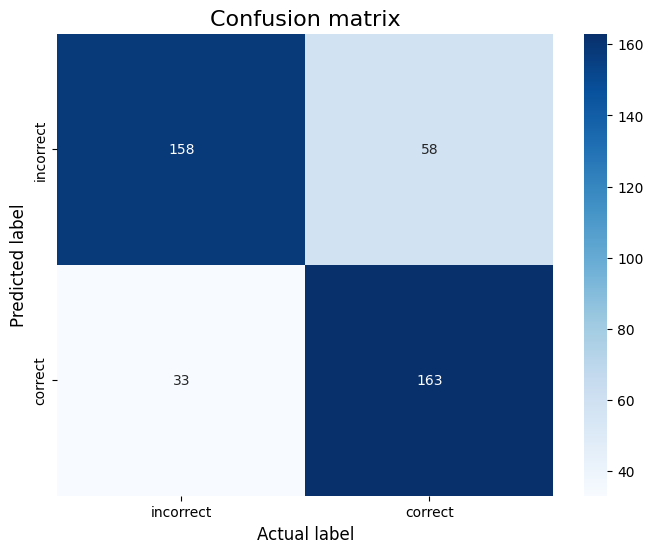

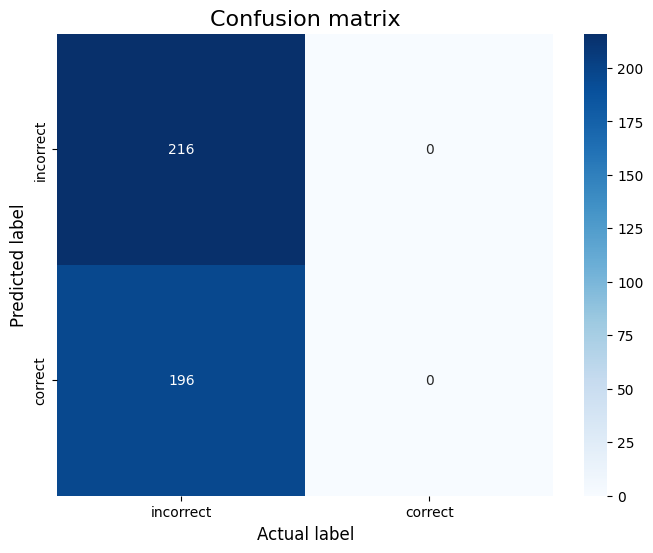

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''

    sentiment_classes = ['incorrect', 'correct']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
print("Model 1")
plot_confusion_matrix(model, X_test, y_test)
print("model2")
plot_confusion_matrix(model2, X_test, y_test)

In [ ]:
from keras.models import load_model

# Load model
#model = load_model('best_model.h5')

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''

    sentiment_classes = ['incorrect', 'correct']
    max_len=4
    final_text=pre_text(text)
    #print(pro_text)
    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences([final_text])
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt1 = model2.predict(xt)

    print(yt1)

    yt=yt1.argmax(axis=1)
    # Print the predicted sentiment
    print('The predicted sentiment is', sentiment_classes[yt[0]])

In [ ]:
predict_class("ජනෙල් වහන්න")
predict_class("වහන්න ජනෙල්")
predict_class("අරින්න දොර")


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step
[[0.5051156 0.4948843]]
The predicted sentiment is incorrect
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
[[0.5051156 0.4948843]]
The predicted sentiment is incorrect
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
[[0.5051156 0.4948843]]
The predicted sentiment is incorrect
